In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [288]:
df = pd.read_csv('../data/market_integrates_100.csv')
print(df)



     market_ids  firm_ids  characteristic1  characteristic2     prices  \
0             1         1         5.433865         2.042325  23.994561   
1             1         2         5.907737         2.412709  22.799957   
2             1         3         5.943911         2.174390  22.293546   
3             1         4         5.329441         2.844997  24.472704   
4             1         5         5.083033         2.137079  25.714607   
..          ...       ...              ...              ...        ...   
995         100         6         5.360283         2.580602  22.145922   
996         100         7         5.958183         2.650134  21.172652   
997         100         8         5.184745         2.346844  26.109766   
998         100         9         5.223118         2.464959  25.816435   
999         100        10         5.019838         2.675947  23.031981   

     marginal_cost    shares   profits   markups  e_quantity    capital  \
0        16.639639  0.057343  0.4217

In [289]:
# df_grouped = df.groupby('product')
# print(df_grouped)
# # Look at the firm with bad product charactristics
# group1 = df_grouped.get_group(2)
# # Look at a firm with good product characteristics
# group4 = df_grouped.get_group(4)



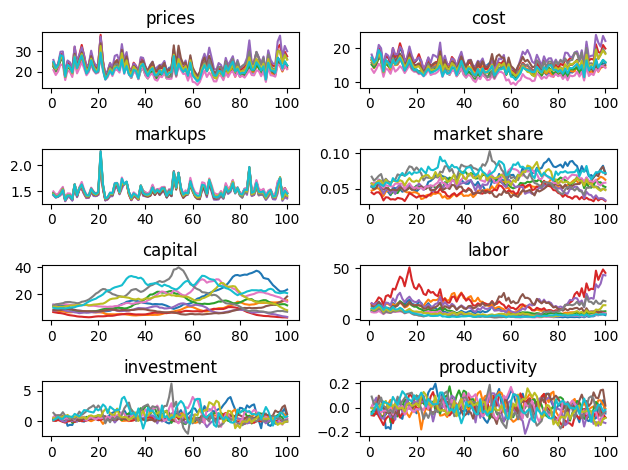

In [290]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2)

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.prices)
    ax2.plot(df_firm.market_ids, df_firm.marginal_cost)
    ax3.plot(df_firm.market_ids, df_firm.markups)
    ax4.plot(df_firm.market_ids, df_firm.shares)
    ax5.plot(df_firm.market_ids, df_firm.capital)
    ax6.plot(df_firm.market_ids, df_firm.labor)
    ax7.plot(df_firm.market_ids, df_firm.investment)
    ax8.plot(df_firm.market_ids, df_firm.productivity)


ax1.set_title('prices')
ax2.set_title('cost')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax8.set_title('productivity')




plt.tight_layout()
plt.show()

In [291]:
# df_cc = pd.read_csv('../data/market_constant_cost100.csv')
df_grouped_cc = df.groupby('product')
# Look at the firm with bad product charactristics
group1_cc = df_grouped_cc.get_group(2)
# Look at a firm with good product characteristics
group4_cc = df_grouped_cc.get_group(4)




KeyError: 'product'

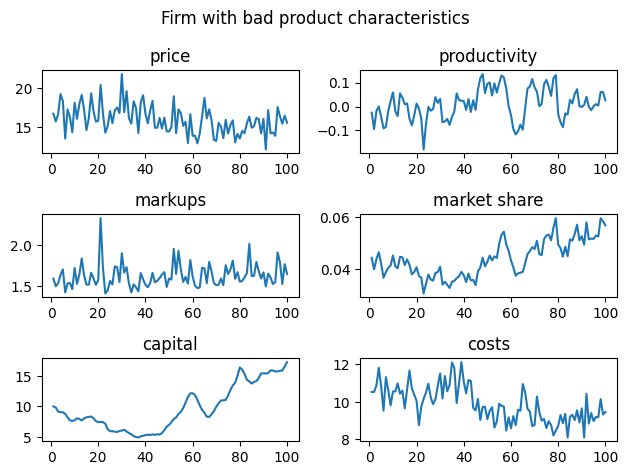

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with bad product characteristics')

ax1.plot(group1_cc.time, group1_cc.price)
ax2.plot(group1_cc.time, group1_cc.productivity)
ax3.plot(group1_cc.time, group1_cc.markups)
ax4.plot(group1_cc.time, group1_cc.mshare)
ax5.plot(group1_cc.time, group1_cc.capital)
ax6.plot(group1_cc.time, group1_cc.marginal_cost)

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()


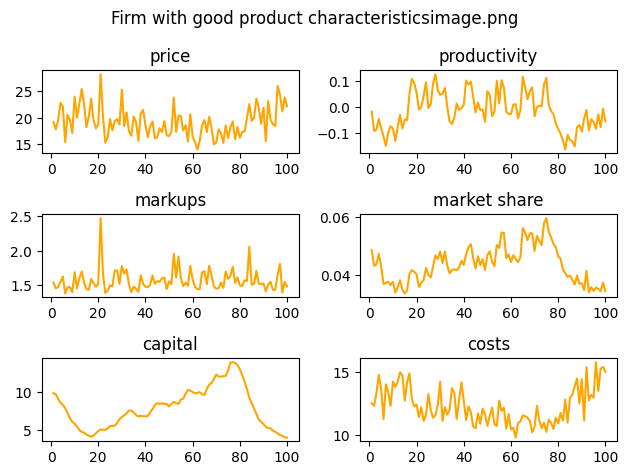

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with good product characteristicsimage.png')

ax1.plot(group4_cc.time, group4_cc.price, color='orange')
ax2.plot(group4_cc.time, group4_cc.productivity, color='orange')
ax3.plot(group4_cc.time, group4_cc.markups, color='orange')
ax4.plot(group4_cc.time, group4_cc.mshare, color='orange')
ax5.plot(group4_cc.time, group4_cc.capital, color='orange')
ax6.plot(group4_cc.time, group4_cc.marginal_cost, color='orange')

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()

<Axes: >

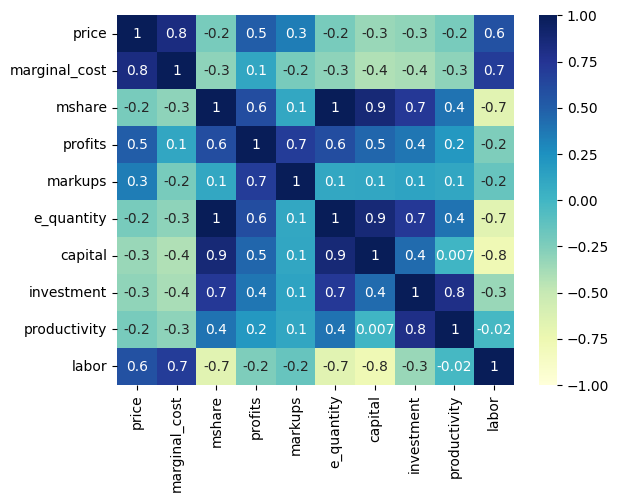

In [ ]:
heatmap_df = df.drop(['time','product', 'characteristic1', 'characteristic2'], axis=1)
sns.heatmap(heatmap_df.corr(), vmin = -1., vmax=1., cmap="YlGnBu", annot=True, fmt='.1g')
